In [9]:
#this is array and table and machine learning stuff
import math
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import XGBModel
from xgboost import XGBRegressor

#this is plot stuff
import matplotlib.pyplot as plt
import seaborn as sns

#idk what this is but Data100 used it
import scipy.stats

In [13]:
apple_url = 'apple_quality.csv'
apple = pd.read_csv(apple_url)

In [14]:
display(apple)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [15]:
sweetness_mean = np.mean(apple['Sweetness'])
sweetness_std = np.std(apple['Sweetness'])
print("The sweetness average for all apples is", sweetness_mean, ". The sweetness standard deviation is", sweetness_std, ".")

The sweetness average for all apples is -0.47047851978824995 . The sweetness standard deviation is 1.9431977136530587 .


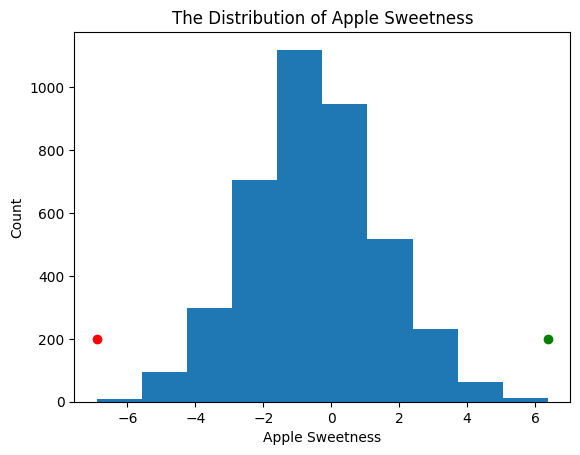

In [16]:
plt.hist(apple['Sweetness'])
plt.plot(apple['Sweetness'].min(), 200, 'ro', label = 'min')
plt.plot(apple['Sweetness'].max(), 200, 'go', label = 'max')
plt.title("The Distribution of Apple Sweetness")
plt.xlabel("Apple Sweetness")
plt.ylabel("Count")
plt.show()

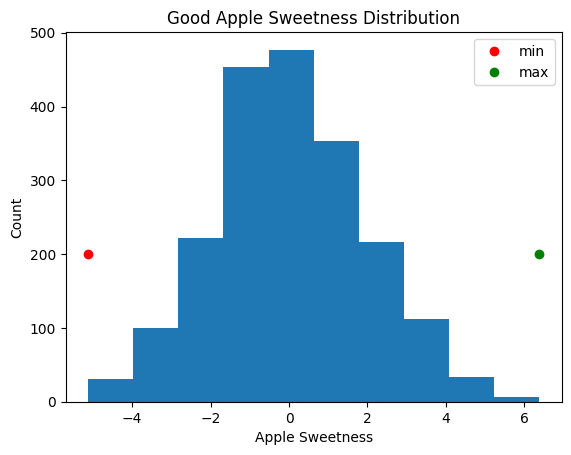

In [17]:
apple_good = apple[apple['Quality']=="good"]
plt.hist(apple_good['Sweetness'])
plt.title("Good Apple Sweetness Distribution")
plt.plot(apple_good['Sweetness'].min(), 200, 'ro', label = 'min')
plt.plot(apple_good['Sweetness'].max(), 200, 'go', label = 'max')
plt.xlabel("Apple Sweetness")
plt.ylabel("Count")
plt.legend()
plt.show()

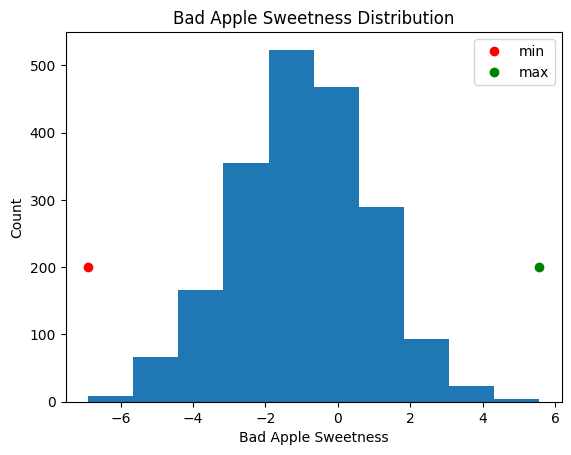

In [18]:
apple_bad = apple[apple["Quality"]=="bad"]
plt.hist(apple_bad['Sweetness'])
plt.plot(apple_bad['Sweetness'].min(), 200, 'ro', label = 'min')
plt.plot(apple_bad['Sweetness'].max(), 200, 'go', label = 'max')
plt.title("Bad Apple Sweetness Distribution")
plt.xlabel("Bad Apple Sweetness")
plt.ylabel("Count")
plt.legend()
plt.show()

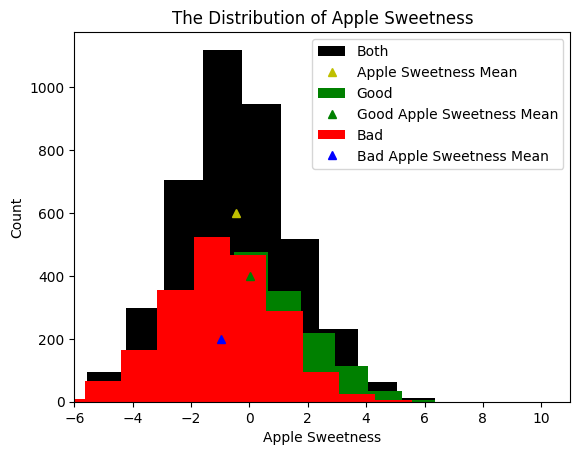

In [19]:
# Let's do overlaid graphs to compare.

#this is all apples
plt.hist(apple['Sweetness'], label = "Both", color = 'black')
plt.plot(np.mean(apple["Sweetness"]), 600, "y^", label = 'Apple Sweetness Mean')

#this is good apples
plt.hist(apple_good['Sweetness'], label = "Good", color = 'green')
plt.plot(np.mean(apple_good['Sweetness']), 400, "g^", label = "Good Apple Sweetness Mean")

#this is bad apples
plt.hist(apple_bad['Sweetness'], label = 'Bad', color = 'red')
plt.plot(np.mean(apple_bad['Sweetness']), 200, "b^", label = "Bad Apple Sweetness Mean")

plt.title("The Distribution of Apple Sweetness")
plt.xlabel("Apple Sweetness")
plt.ylabel("Count")
plt.xlim(-6, 11)
plt.legend()
plt.show()

In [20]:
print("It seems like sweet apples tend to be classified as good, while bad apples tend to be classified as a bit sour!")

It seems like sweet apples tend to be classified as good, while bad apples tend to be classified as a bit sour!


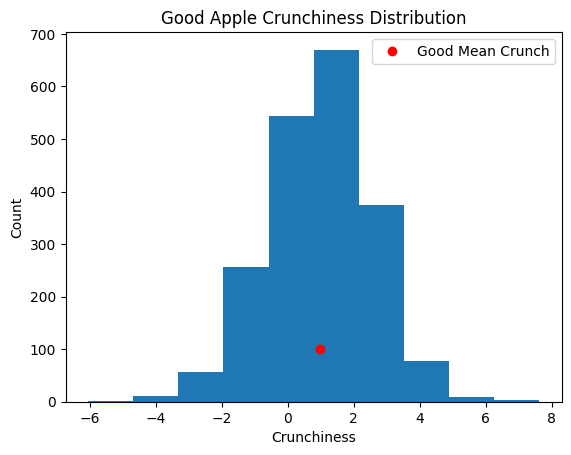

In [21]:
# I tried acidity and it didn't really have any meaning, so I switched to crunchiness.
plt.hist(apple_good["Crunchiness"])
plt.plot(np.mean(apple_good['Crunchiness']),100, "ro", label = "Good Mean Crunch")
plt.xlabel("Crunchiness")
plt.ylabel("Count")
plt.title("Good Apple Crunchiness Distribution")
plt.legend()
plt.show()

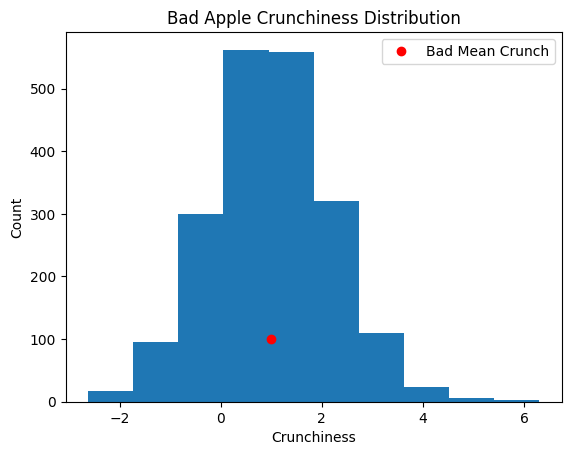

In [22]:
plt.hist(apple_bad["Crunchiness"])
plt.plot(np.mean(apple_bad['Crunchiness']),100, "ro", label = "Bad Mean Crunch")
plt.xlabel("Crunchiness")
plt.ylabel("Count")
plt.title("Bad Apple Crunchiness Distribution")
plt.legend()
plt.show()

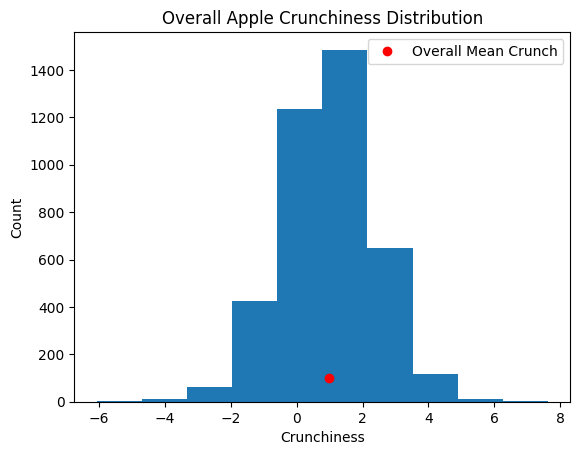

In [23]:
plt.hist(apple["Crunchiness"])
plt.plot(np.mean(apple['Crunchiness']),100, "ro", label = "Overall Mean Crunch")
plt.xlabel("Crunchiness")
plt.ylabel("Count")
plt.title("Overall Apple Crunchiness Distribution")
plt.legend()
plt.show()

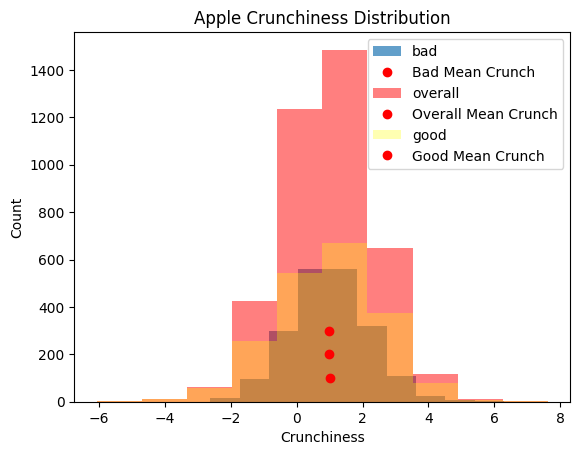

In [24]:
plt.hist(apple_bad["Crunchiness"], label = "bad", alpha = 0.7)
plt.plot(np.mean(apple_bad['Crunchiness']),100, "ro", label = "Bad Mean Crunch")
plt.hist(apple["Crunchiness"], label = 'overall', alpha = 0.5, color = 'red')
plt.plot(np.mean(apple['Crunchiness']),200, "ro", label = "Overall Mean Crunch")
plt.hist(apple_good["Crunchiness"], label = 'good', alpha = 0.3, color = 'yellow')
plt.plot(np.mean(apple_good['Crunchiness']),300, "ro", label = "Good Mean Crunch")
plt.xlabel("Crunchiness")
plt.ylabel("Count")
plt.title("Apple Crunchiness Distribution")
plt.legend()
plt.show()

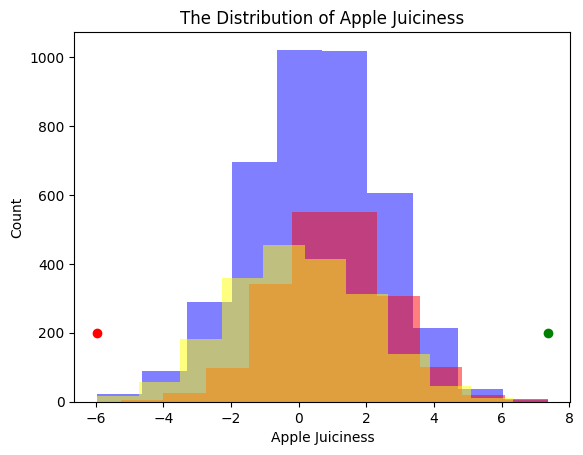

In [25]:
plt.hist(apple['Juiciness'], alpha = 0.5, color = 'blue')
plt.hist(apple_good['Juiciness'], alpha = 0.5, color = 'red')
plt.hist(apple_bad['Juiciness'], alpha = 0.5, color = 'yellow')
plt.plot(apple['Juiciness'].min(), 200, 'ro', label = 'min')
plt.plot(apple['Juiciness'].max(), 200, 'go', label = 'max')
plt.title("The Distribution of Apple Juiciness")
plt.xlabel("Apple Juiciness")
plt.ylabel("Count")
plt.show()

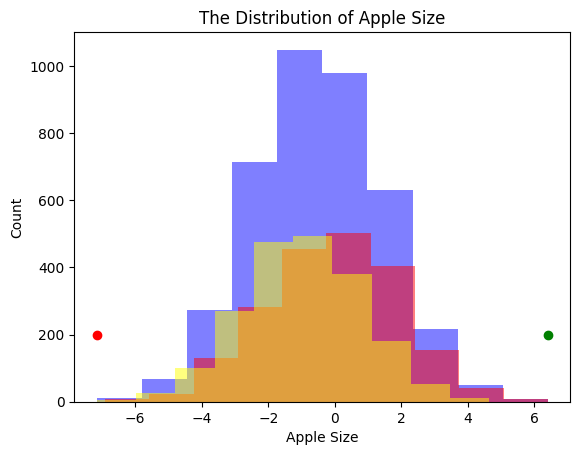

In [26]:
plt.hist(apple['Size'], alpha = 0.5, color = 'blue')
plt.hist(apple_good['Size'], alpha = 0.5, color = 'red')
plt.hist(apple_bad['Size'], alpha = 0.5, color = 'yellow')
plt.plot(apple['Size'].min(), 200, 'ro', label = 'min')
plt.plot(apple['Size'].max(), 200, 'go', label = 'max')
plt.title("The Distribution of Apple Size")
plt.xlabel("Apple Size")
plt.ylabel("Count")
plt.show()

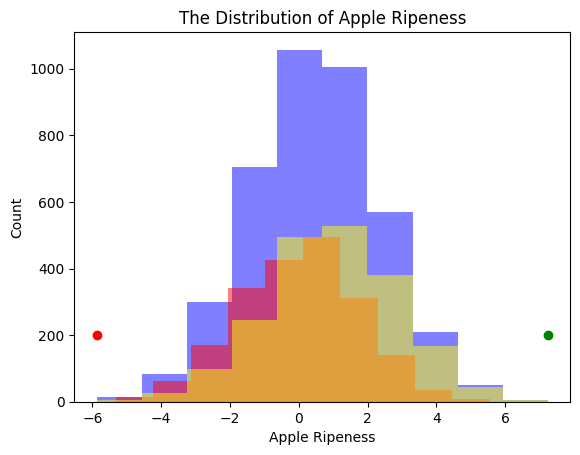

In [70]:
plt.hist(apple['Ripeness'], alpha = 0.5, color = 'blue')
plt.hist(apple_good['Ripeness'], alpha = 0.5, color = 'red')
plt.hist(apple_bad['Ripeness'], alpha = 0.5, color = 'yellow')
plt.plot(apple['Ripeness'].min(), 200, 'ro', label = 'min')
plt.plot(apple['Ripeness'].max(), 200, 'go', label = 'max')
plt.title("The Distribution of Apple Ripeness")
plt.xlabel("Apple Ripeness")
plt.ylabel("Count")
plt.show()

In [71]:
# Looking at crunchiness levels seems to be not helpful, similar to acidity (which isn't displayed). Let's check correlation.

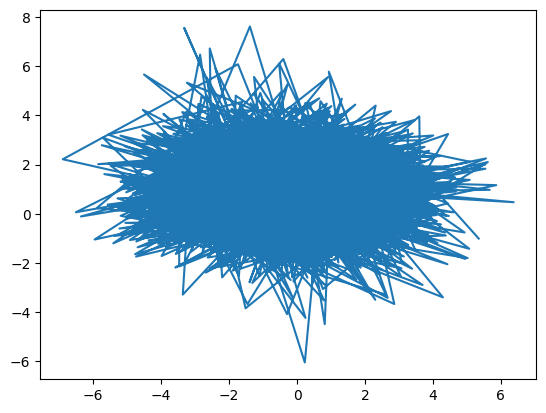

In [72]:
plt.plot(apple['Sweetness'], apple['Crunchiness'])

In [30]:
#Ok, that wasn't too helpful.

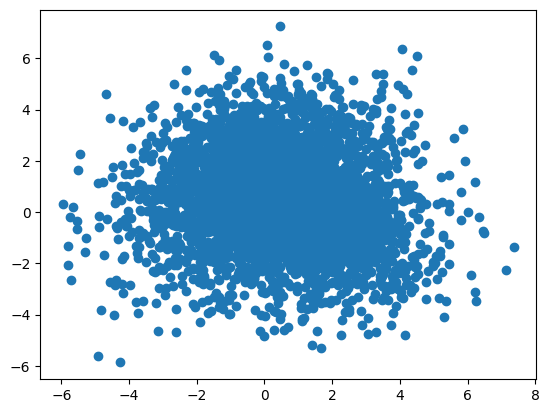

In [31]:
plt.scatter(apple['Juiciness'], apple['Ripeness'])

In [32]:
#i got tired of constantly referring to them by name, so I just... simplified things

juice = apple['Juiciness']
ripe = apple['Ripeness']
sweet = apple['Sweetness']
crunch = apple['Crunchiness']
weight = apple['Weight']
size = apple['Size']
acid = apple['Acidity']
quality = apple['Quality']

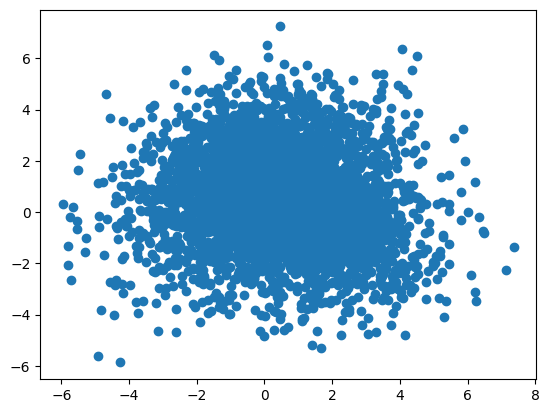

In [33]:
plt.scatter(juice, ripe)

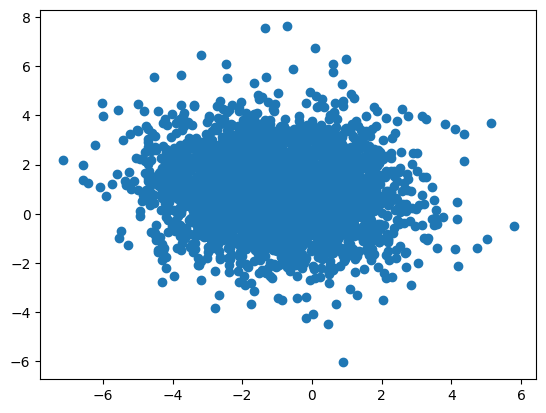

In [34]:
plt.scatter(weight, crunch)

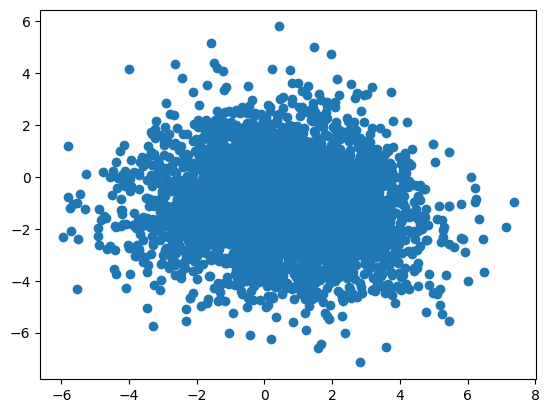

In [35]:
plt.scatter(juice, weight)

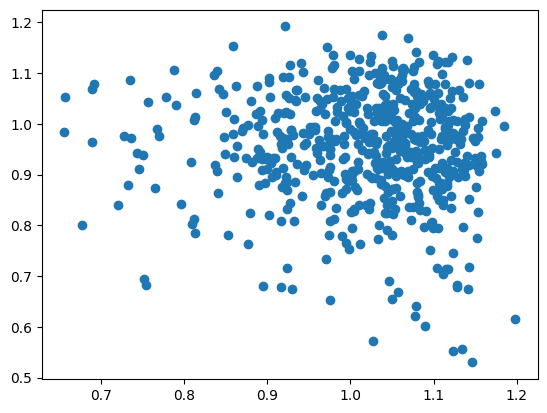

In [36]:
plt.scatter(juice**0.1, weight**0.1)

In [37]:
print("A correlation between juice and weight is plausible.")

A correlation between juice and weight is plausible.


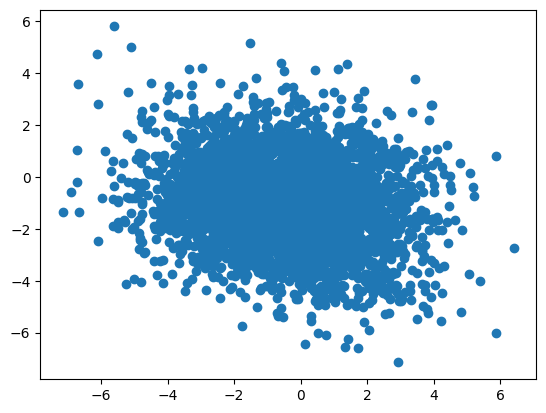

In [38]:
plt.scatter(size, weight)

Text(0, 0.5, 'Weight')

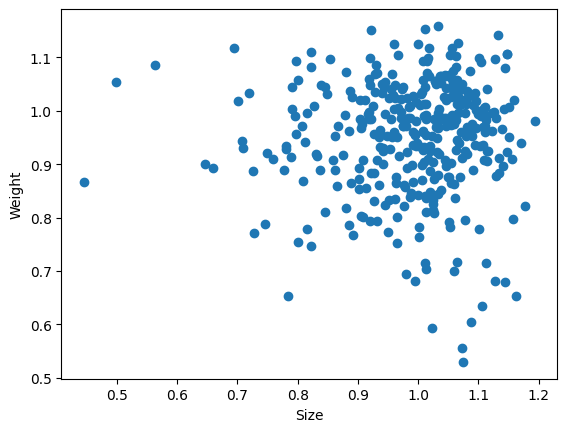

In [39]:
plt.scatter(size**0.1, weight**0.1)
plt.xlabel("Size")
plt.ylabel("Weight")

In [40]:
print("Size and weight seem to have some sort of correlation.")

Size and weight seem to have some sort of correlation.


In [41]:
#what if I just... made a machine learning model rn? Dropping all na values.

In [42]:
#i got tired of constantly referring to them by name, so I just... simplified things

apple = apple.dropna()
X = apple[['Juiciness', 'Size', "Acidity", "Ripeness", "Crunchiness", "Sweetness"]]
Y = apple['Weight']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)

In [43]:
linear_model = lm.LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_test = linear_model.predict(X_test)
y_pred_train = linear_model.predict(X_train)
training_accuracy = linear_model.score(X_train, Y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.2604449241581437


In [44]:
#that was extremely depressing. what if we split by good and bad?

In [45]:
apple_good = apple_good.dropna()
X = apple_good[['Juiciness', 'Size', "Acidity", "Ripeness", "Crunchiness", "Sweetness"]]
Y = apple_good['Weight']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)

In [46]:
good_linear_model = lm.LinearRegression()
good_linear_model.fit(X_train, Y_train)
training_accuracy = good_linear_model.score(X_train, Y_train)
training_accuracy

0.3705548925488662

In [47]:
#The accuracy improves!

In [48]:
apple_bad = apple_bad.dropna()
X = apple_bad[['Juiciness', 'Size', "Acidity", "Ripeness", "Crunchiness", "Sweetness"]]
Y = apple_bad['Weight']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)

In [49]:
bad_lm = lm.LinearRegression()
bad_lm.fit(X_train, Y_train)
training_accuracy = bad_lm.score(X_train, Y_train)
training_accuracy

0.19927436959382072

In [50]:
#but dies at bad...

#i'll just do logistic regression another day

In [51]:
# Now, let's do some PCA! PCA stands for Principal Component Analysis. 

In [52]:
#We'll do PCA with our dataset. 

apple_narrowed = apple[['Crunchiness', 'Juiciness', 'Ripeness', 'Size', 'Sweetness']].dropna()
apple_features = apple_narrowed.to_numpy()
apple_mean = np.mean(apple_features, axis = 0)
apple_std = np.std(apple_features, axis = 0)
apple_standardized = (apple_features-apple_mean)/apple_std
#apple_mean, apple_std

In [53]:
#PCA isa n application of SVD for matrices, so let's calculate the SVD of our matrix.
u, s, vt = np.linalg.svd(apple_standardized, full_matrices = False)
print(f"Dimensions of U: {u.shape}")
print(f"1D List of diagonal elements of Sigma: {s}")
print(f"Dimensions of V Transpose: {vt.shape}")

Dimensions of U: (4000, 5)
1D List of diagonal elements of Sigma: [76.40317945 72.669296   66.14483229 50.10520883 44.67725146]
Dimensions of V Transpose: (5, 5)


In [54]:
# Calculate total variance.

apple_total_variance = np.sum(s**2)/apple_standardized.shape[0]

In [55]:
apple_2d = apple_standardized @ vt[0:2, :].T
apple_2d.shape

(4000, 2)

<Axes: title={'center': 'PCA Analysis of Apples'}, xlabel='Apple PC1', ylabel='Apple PC2'>

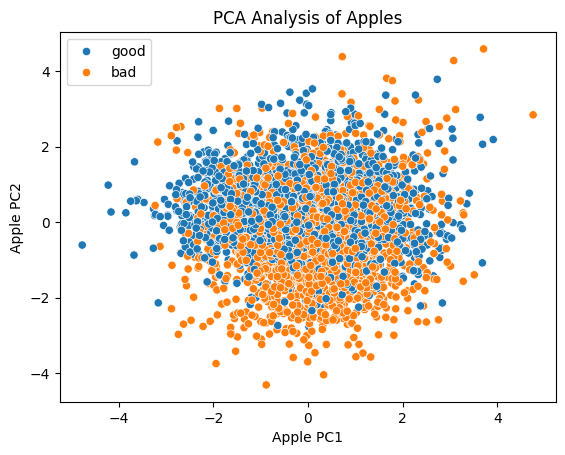

In [56]:
plt.title("PC2 vs. PC1 for Apple Data")
plt.xlabel("Apple PC1")
plt.ylabel("Apple PC2")
plt.title("PCA Analysis of Apples")
sns.scatterplot(x = apple_2d[:, 0], y = apple_2d[:, 1], hue = apple['Quality'].to_numpy())

In [57]:
# This looks somewhat separated? Let's see if we can separate even more.

In [58]:
#We'll do PCA with our dataset, but this time, with cube rooting everything. I originally had the idea of using log, but realized that I had negative values, thus the use of the cube root. 

apple_narrowed = apple[['Crunchiness', 'Juiciness', 'Ripeness', 'Size', 'Sweetness']].dropna()
apple_features = apple_narrowed.to_numpy()
apple_features = np.cbrt(apple_features)
apple_mean = np.mean(apple_features, axis = 0)
apple_std = np.std(apple_features, axis = 0)
apple_standardized = (apple_features-apple_mean)/apple_std
#apple_mean, apple_std

In [59]:
#PCA isa n application of SVD for matrices, so let's calculate the SVD of our matrix.
u, s, vt = np.linalg.svd(apple_standardized, full_matrices = False)
print(f"Dimensions of U: {u.shape}")
print(f"1D List of diagonal elements of Sigma: {s}")
print(f"Dimensions of V Transpose: {vt.shape}")

Dimensions of U: (4000, 5)
1D List of diagonal elements of Sigma: [74.42812594 69.38645877 65.85410791 54.65953441 48.18241565]
Dimensions of V Transpose: (5, 5)


In [60]:
# Calculate total variance.

apple_total_variance = np.sum(s**2)/apple_standardized.shape[0]

In [61]:
# This just confirms we did nothing wrong...

apple_2d = apple_standardized @ vt[0:2, :].T
apple_2d.shape

(4000, 2)

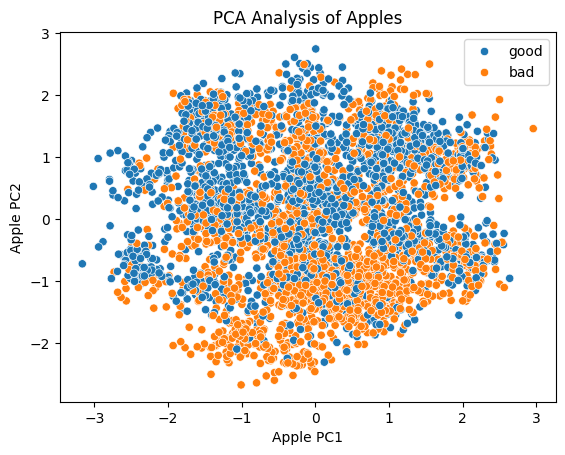

In [62]:
plt.title("PC2 vs. PC1 for Apple Data")
plt.xlabel("Apple PC1")
plt.ylabel("Apple PC2")
plt.title("PCA Analysis of Apples")
sns.scatterplot(x = apple_2d[:, 0], y = apple_2d[:, 1], hue = apple['Quality'].to_numpy())
plt.show()

In [63]:
# While this graph looks better... we still need more separation. Let's try using the square.

In [64]:
#We'll do PCA with our dataset, but this time, with cube rooting everything. I originally had the idea of using log, but realized that I had negative values, thus the use of the square. 

apple_narrowed = apple[['Crunchiness', 'Juiciness', 'Ripeness', 'Size', 'Sweetness']].dropna()
apple_features = apple_narrowed.to_numpy()
apple_features = apple_features**2
apple_mean = np.mean(apple_features, axis = 0)
apple_std = np.std(apple_features, axis = 0)
apple_standardized = (apple_features-apple_mean)/apple_std
#apple_mean, apple_std

In [65]:
#PCA isa n application of SVD for matrices, so let's calculate the SVD of our matrix.
u, s, vt = np.linalg.svd(apple_standardized, full_matrices = False)
print(f"Dimensions of U: {u.shape}")
print(f"1D List of diagonal elements of Sigma: {s}")
print(f"Dimensions of V Transpose: {vt.shape}")

Dimensions of U: (4000, 5)
1D List of diagonal elements of Sigma: [70.99159053 65.37511467 62.84472106 59.39760874 56.64586098]
Dimensions of V Transpose: (5, 5)


In [66]:
# This just confirms we did nothing wrong...

apple_2d = apple_standardized @ vt[0:2, :].T
apple_2d.shape

(4000, 2)

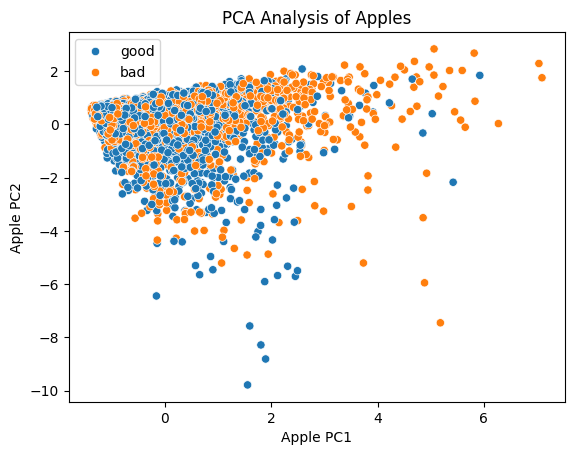

In [67]:
plt.title("PC2 vs. PC1 for Apple Data")
plt.xlabel("Apple PC1")
plt.ylabel("Apple PC2")
plt.title("PCA Analysis of Apples")
sns.scatterplot(x = apple_2d[:, 0], y = apple_2d[:, 1], hue = apple['Quality'].to_numpy())
plt.show()

In [68]:
# This looks weird? There are no clusters.

In [69]:
#We'll do PCA with our dataset, but this time, with cube rooting everything. I originally had the idea of using log, but realized that I had negative values, thus the use of the square. 

apple_narrowed = apple[['Crunchiness', 'Juiciness', 'Ripeness', 'Size', 'Sweetness']].dropna()
apple_features = apple_narrowed.to_numpy()
apple_features = 1/apple_features
apple_mean = np.mean(apple_features, axis = 0)
apple_std = np.std(apple_features, axis = 0)
apple_standardized = (apple_features-apple_mean)/apple_std
#apple_mean, apple_std

In [123]:
u, s, vt = np.linalg.svd(apple_standardized, full_matrices = False)
print(f"Dimensions of U: {u.shape}")
print(f"1D List of diagonal elements of Sigma: {s}")
print(f"Dimensions of V Transpose: {vt.shape}")

Dimensions of U: (4000, 5)
1D List of diagonal elements of Sigma: [63.36371197 63.33778003 63.2468536  63.20156307 63.07744098]
Dimensions of V Transpose: (5, 5)


In [124]:
# This just confirms we did nothing wrong... just kidding, its essential.

apple_2d = apple_standardized @ vt[0:2, :].T
apple_2d.shape

(4000, 2)

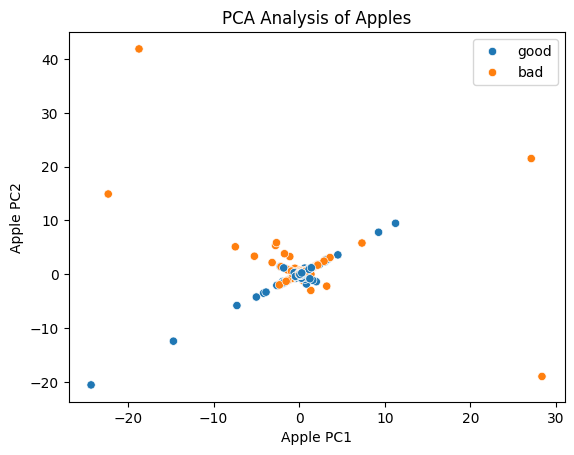

In [125]:
plt.title("PC2 vs. PC1 for Apple Data")
plt.xlabel("Apple PC1")
plt.ylabel("Apple PC2")
plt.title("PCA Analysis of Apples")
sns.scatterplot(x = apple_2d[:, 0], y = apple_2d[:, 1], hue = apple['Quality'].to_numpy())
plt.show()

In [126]:
# this still looks strange. Negative reciprocal maybe?

In [127]:
apple_narrowed = apple[['Crunchiness', 'Juiciness', 'Ripeness', 'Size', 'Sweetness']].dropna()
apple_features = apple_narrowed.to_numpy()
apple_features = -1/apple_features
apple_mean = np.mean(apple_features, axis = 0)
apple_std = np.std(apple_features, axis = 0)
apple_standardized = (apple_features-apple_mean)/apple_std

In [128]:
u, s, vt = np.linalg.svd(apple_standardized, full_matrices = False)
print(f"Dimensions of U: {u.shape}")
print(f"1D List of diagonal elements of Sigma: {s}")
print(f"Dimensions of V Transpose: {vt.shape}")

Dimensions of U: (4000, 5)
1D List of diagonal elements of Sigma: [63.36371197 63.33778003 63.2468536  63.20156307 63.07744098]
Dimensions of V Transpose: (5, 5)


In [129]:
# Calculate total variance.

apple_total_variance = np.sum(s**2)/apple_standardized.shape[0]

In [131]:
# This just confirms we did nothing wrong... Just kidding.

apple_2d = apple_standardized @ vt[0:2, :].T
apple_2d.shape

(4000, 2)

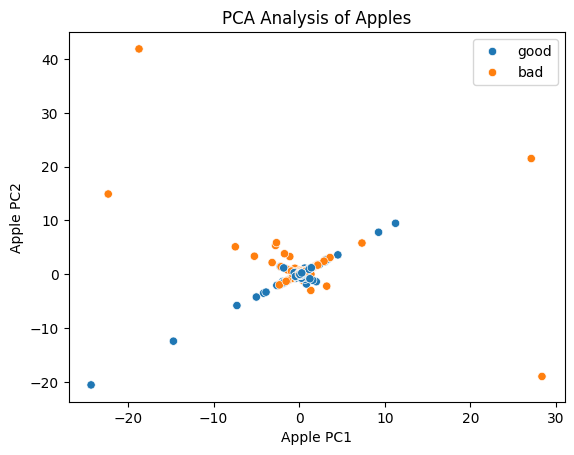

In [132]:
plt.title("PC2 vs. PC1 for Apple Data")
plt.xlabel("Apple PC1")
plt.ylabel("Apple PC2")
plt.title("PCA Analysis of Apples")
sns.scatterplot(x = apple_2d[:, 0], y = apple_2d[:, 1], hue = apple['Quality'].to_numpy())
plt.show()

In [133]:
# We could try absolute value and log?

In [134]:
apple_narrowed = apple[['Crunchiness', 'Juiciness', 'Ripeness', 'Size', 'Sweetness']].dropna()
apple_features = apple_narrowed.to_numpy()
apple_features = np.log(abs(apple_features))
apple_mean = np.mean(apple_features, axis = 0)
apple_std = np.std(apple_features, axis = 0)
apple_standardized = (apple_features-apple_mean)/apple_std

In [135]:
u, s, vt = np.linalg.svd(apple_standardized, full_matrices = False)
print(f"Dimensions of U: {u.shape}")
print(f"1D List of diagonal elements of Sigma: {s}")
print(f"Dimensions of V Transpose: {vt.shape}")

Dimensions of U: (4000, 5)
1D List of diagonal elements of Sigma: [66.56410743 65.60267261 62.45982365 60.9159803  60.44437709]
Dimensions of V Transpose: (5, 5)


In [136]:
# Calculate total variance.

apple_total_variance = np.sum(s**2)/apple_standardized.shape[0]

In [137]:
# This just confirms we did nothing wrong... Just kidding.

apple_2d = apple_standardized @ vt[0:2, :].T
apple_2d.shape

(4000, 2)

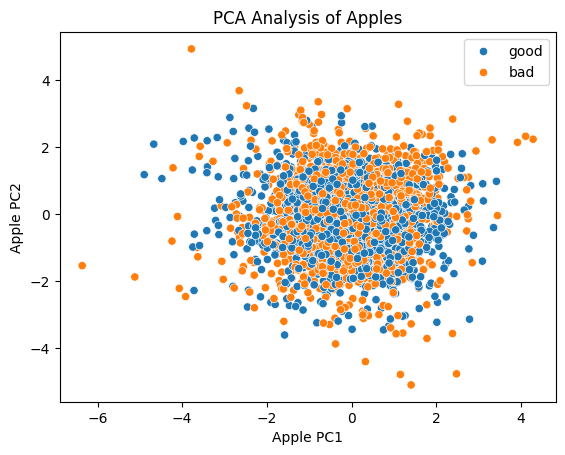

In [138]:
plt.title("PC2 vs. PC1 for Apple Data")
plt.xlabel("Apple PC1")
plt.ylabel("Apple PC2")
plt.title("PCA Analysis of Apples")
sns.scatterplot(x = apple_2d[:, 0], y = apple_2d[:, 1], hue = apple['Quality'].to_numpy())
plt.show()

In [139]:
# Unfortunately, it does nothing. Jade is somewhat desperate for more defined clusters, so she'll try cubing everything.

In [140]:
apple_narrowed = apple[['Crunchiness', 'Juiciness', 'Ripeness', 'Size', 'Sweetness']].dropna()
apple_features = apple_narrowed.to_numpy()
apple_features = apple_features**3
apple_mean = np.mean(apple_features, axis = 0)
apple_std = np.std(apple_features, axis = 0)
apple_standardized = (apple_features-apple_mean)/apple_std

In [141]:
u, s, vt = np.linalg.svd(apple_standardized, full_matrices = False)
print(f"Dimensions of U: {u.shape}")
print(f"1D List of diagonal elements of Sigma: {s}")
print(f"Dimensions of V Transpose: {vt.shape}")

Dimensions of U: (4000, 5)
1D List of diagonal elements of Sigma: [71.96662351 71.25283306 65.04886536 55.51666278 49.29892646]
Dimensions of V Transpose: (5, 5)


In [142]:
# Calculate total variance.

apple_total_variance = np.sum(s**2)/apple_standardized.shape[0]

In [143]:
# This just confirms we did nothing wrong... Just kidding.

apple_2d = apple_standardized @ vt[0:2, :].T
apple_2d.shape

(4000, 2)

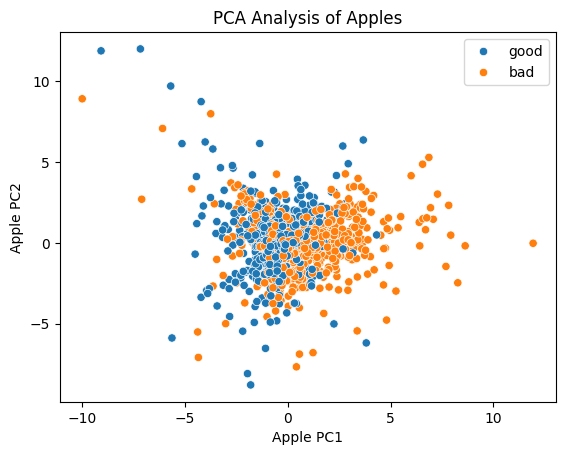

In [144]:
plt.title("PC2 vs. PC1 for Apple Data")
plt.xlabel("Apple PC1")
plt.ylabel("Apple PC2")
plt.title("PCA Analysis of Apples")
sns.scatterplot(x = apple_2d[:, 0], y = apple_2d[:, 1], hue = apple['Quality'].to_numpy())
plt.show()

In [145]:
# Ok actually... this lowkey slays.

In [ ]:
# That's it for today! I hope you enjoyed seeing this trainwreck of a project! Jade out!